Inspired by 4th year module SPA7022 Solar System

In [14]:
import random as rnd
from matplotlib import pyplot as plt
import math
from time import time

In [15]:
import matplotlib
# matplotlib.rcParams['savefig.dpi'] = 480
matplotlib.rcParams["figure.dpi"] = 240

In [16]:
def search_attractors(n = 4): # Sets default n to 4

    found = 0

    while found < n:

        #  Create random starting point (x and y coordinates)
        x = rnd.uniform(-0.5, 0.5)
        y = rnd.uniform(-0.5, 0.5)

        # Random alternative point nearby
        xe = x + (rnd.uniform(-0.5, 0.5) / 1000)
        ye = y + (rnd.uniform(-0.5, 0.5) / 1000)

        # Distance between the two points
        dx = xe - x
        dy = ye - y
        d0 = math.sqrt((dx ** 2) + (dy ** 2))

        # Create random parameter vector
        a = [rnd.uniform(-2, 2) for i in range(12)]

        # Store path in lists
        x_list = [x]
        y_list = [y]

        # Initialse converging boolean and lyapunov exponent
        converging = False
        lyapunov = 0

        # Iterativey pass (x, y) into the quadratic map
        for i in range(10000):

            # Compute next point using the current point coordinates and parameter vector
            # Quadratic map: x_t+1 = (a_1) + (a_2 * x_t) + (a_3 * x_t ^ 2) + (a_4 * y_t) + (a_5 * y_t ^ 2) + (a_6 * x_t * y_t)
            #                y_t+1 = (a_7) + (a_8 * x_t) + (a_9 * x_t ^ 2) + (a_10 * y_t) + (a_11 * y_t ^ 2) + (a_12 * x_t * y_t)
            # Order of 'a' values does not matter as they are all random

            x_new = a[0] + (a[1] * x) + (a[2] * (x ** 2)) + (a[3] * y) + (a[4] * (y ** 2)) + (a[5] * x * y)
            y_new = a[6] + (a[7] * x) + (a[8] * (x ** 2)) + (a[9] * y) + (a[10] * (y ** 2)) + (a[11] * x * y)

            # Check if converges to infinity - rule out inifinity cases
            if (x_new > 1e10) or (y_new > 1e10) or (x_new < -1e10) or (y_new < -1e10):
                converging = True
                break

            # Check if converges to a single point - check for a minimum amount of movement in *both* dimensions
            if (abs(x - x_new) < 1e-10) and (abs(y - y_new) < 1e-10):
                converging = True
                break

            # Check for chaotic behaviour
            if i > 1000:

                # Compute next alternative point
                xe_new = a[0] + (a[1] * xe) + (a[2] * (xe ** 2)) + (a[3] * ye) + (a[4] * (ye ** 2)) + (a[5] * xe * ye)
                ye_new = a[6] + (a[7] * xe) + (a[8] * (xe ** 2)) + (a[9] * ye) + (a[10] * (ye ** 2)) + (a[11] * xe * ye)

                # Compute the distancebetween the new points
                dx = xe_new - x_new
                dy = ye_new - y_new
                d = math.sqrt((dx ** 2) + (dy ** 2))

                # Lyapunov exponent
                lyapunov += math.log(abs(d / d0))

                # Rescale the alternative point
                xe = x_new + (d0 * dx / d)
                ye = y_new + (d0 * dy / d)

            # Update x and y
            x = x_new
            y = y_new

            # Store new (x, y) in path lists
            x_list.append(x)
            y_list.append(y)

        # If chaotic behaviour has been found
        if (not converging) and (lyapunov >= 10):
            
            # Update counter and print message
            found += 1
            print(str(found) + ". Strange attractor with L = " + str(lyapunov))

            # Clear figure - when saving figures
            plt.clf()

            # Plot design
            plt.style.use("dark_background")
            plt.axis("off")

            # Create the plot
            plt.scatter(x_list[100:], y_list[100:], s = 0.1, c = "white", linewidth = 0)
            # plt.show() # Comment if saving figures

            # Save the figure
            name = str(time())
            plt.savefig("strange_attractors Gallery/Search/" + name + ".png", dpi = 240)

            # Save the parameters
            parameters = (x_list[0], y_list[0], a)
            file = open("strange_attractors Gallery/Search/" + name + ".txt", "w+")
            file.write(str(parameters))

1. Strange attractor with L = 1301.8368871320047


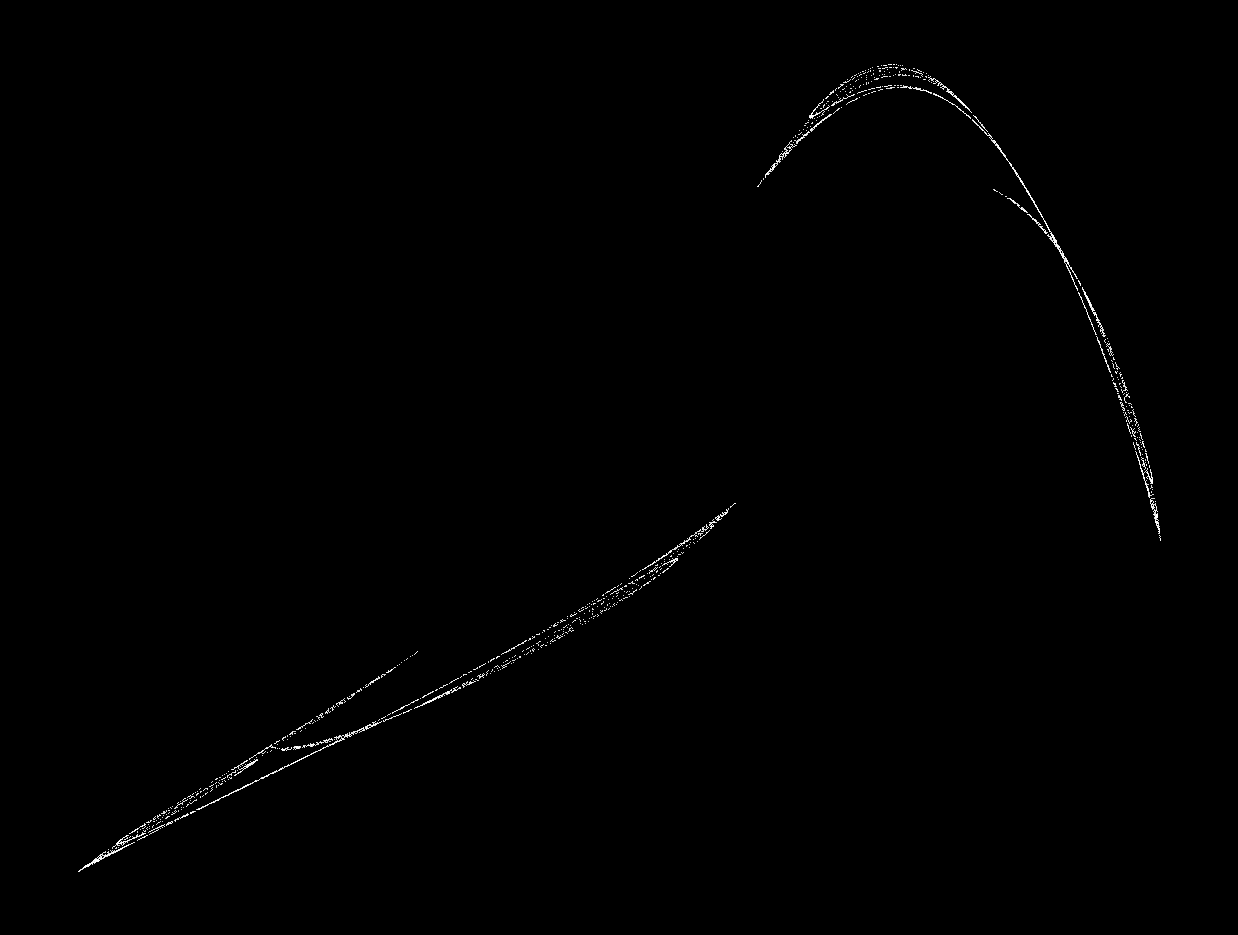

In [17]:
search_attractors(1)
plt.show()

In [18]:
def draw_attractors(parameters):

    # Unpack the parameters
    x, y, a = parameters

    # Store path in lists
    x_list = [x]
    y_list = [y]


    # Iterativey pass (x, y) into the quadratic map
    for i in range(10000):

        # Compute next point using the current point coordinates and parameter vector
        # Quadratic map: x_t+1 = (a_1) + (a_2 * x_t) + (a_3 * x_t ^ 2) + (a_4 * y_t) + (a_5 * y_t ^ 2) + (a_6 * x_t * y_t)
        #                y_t+1 = (a_7) + (a_8 * x_t) + (a_9 * x_t ^ 2) + (a_10 * y_t) + (a_11 * y_t ^ 2) + (a_12 * x_t * y_t)
        # Order of 'a' values does not matter as they are all random

        x_new = a[0] + (a[1] * x) + (a[2] * (x ** 2)) + (a[3] * y) + (a[4] * (y ** 2)) + (a[5] * x * y)
        y_new = a[6] + (a[7] * x) + (a[8] * (x ** 2)) + (a[9] * y) + (a[10] * (y ** 2)) + (a[11] * x * y)

        # Update x and y
        x = x_new
        y = y_new

        # Store new (x, y) in path lists
        x_list.append(x)
        y_list.append(y)

    # Clear figure - when saving figures
    plt.clf()

    # Plot design
    plt.style.use("dark_background")
    plt.axis("off")

    # Create the plot
    plt.scatter(x_list[100:], y_list[100:], s = 0.1, c = "white", linewidth = 0)
    # plt.show() # Comment if saving figures

    # Save the figure
    name = str(time())
    plt.savefig("strange_attractors Gallery/Draw/" + name + ".png", dpi = 1000)

In [23]:
# parameters = ((-0.13223910972167408, 0.28068374567800203, [0.36429356083066766, 1.0158848986935358, -1.7907739072895255, -1.2830667607314954, -0.7057445694010105, 1.8430556776409652, -0.018806058807232073, -0.28831239250682517, 1.9369047393668875, -1.0893003843639009, -0.18437493849823028, -1.5590248502625665]))

# draw_attractors(parameters = parameters)